#DSML investigation:
### You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

### Your mission, should you choose to accept it, is to find that agent before stealing any classified information. Good luck!


# Assignment part one

We have retrieved from the laptop of a spy agent some documents. Our intelligence shows that the person that we are looking for has visited countries X and Y, was in USA between Sept 2019 to Oct 2020. He is currently working undercover.


##Getting to know our data

We have retrieved from the laptop the following file:
- A list of suspects
- The flight records of these potential suspects



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
userRecords = pd.read_csv("userRecords.csv")
travelRecords = pd.read_csv("flightRecords.csv")


#### Shape of the data

Let's first check how many rows and columns (features) are in the user records

In [2]:
userRecords.shape

(954, 10)

---
Moodle quiz question: how many potential suspects were there on the laptop found?

---






#### Check out the first few rows
To protect innocent people, the name of the suspects have been censored, those will be revealed once number of potential suspects decreases. *Note for us, it will be released after the classification as we can focus it on the country of origin*.


In [3]:
userRecords.head(3)

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,0,317991,Lu***,Al*****,29-07-2003,AR,1.0,2.0,Web Designer
1,1,1,241892,Ma****,Ro*******,10-11-1999,AR,1.0,0.0,Banker
2,2,2,303376,Fr****,Ac****,25-07-1984,AR,1.0,0.0,Kitchen staff


#### List the column/feature names

In [4]:
userRecords.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'UserID', 'first_name', 'last_name',
       'birthday', 'country', 'marital_status', 'number_of_kids',
       'employment'],
      dtype='object')

#### Duplicates
You can check if there are duplicates in the dataset.

In [5]:
userRecords.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
949    False
950    False
951    False
952    False
953    False
Length: 954, dtype: bool

Show the duplicated rows if any:

In [6]:
userRecords.loc[userRecords.duplicated()=='True', :]

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment


---
Question for moodle quiz: are there duplicated entries?


---


## Spies often use false identities with fabricated data.

####This means that if some fields are appearing a statistically unusual amount of times, they may be fabricated

In this part we are going to verify if there are birthdates that have been reused an unusual amount of times

Lets first ensure that the birthday column has the correct format:


In [7]:
#Check the data type of each feature
userRecords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    954 non-null    int64  
 1   Unnamed: 0      954 non-null    int64  
 2   UserID          954 non-null    int64  
 3   first_name      953 non-null    object 
 4   last_name       953 non-null    object 
 5   birthday        953 non-null    object 
 6   country         954 non-null    object 
 7   marital_status  852 non-null    object 
 8   number_of_kids  802 non-null    float64
 9   employment      953 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 74.7+ KB


In [8]:
#Convert the culumn "birthday" to datetime
userRecords['birthday'] = pd.to_datetime(userRecords['birthday'], dayfirst=True).to_list()


Let's first find the list of birthdays that are duplicated in the dataset

In [9]:
duplicate_dates = userRecords[userRecords.birthday.duplicated()]['birthday'].to_list()

#optionnal -> sort
duplicate_dates.sort()
duplicate_dates

[Timestamp('1954-03-26 00:00:00'),
 Timestamp('1955-01-08 00:00:00'),
 Timestamp('1957-06-25 00:00:00'),
 Timestamp('1957-12-18 00:00:00'),
 Timestamp('1957-12-24 00:00:00'),
 Timestamp('1960-03-26 00:00:00'),
 Timestamp('1960-06-23 00:00:00'),
 Timestamp('1962-07-07 00:00:00'),
 Timestamp('1967-07-24 00:00:00'),
 Timestamp('1968-09-22 00:00:00'),
 Timestamp('1968-10-09 00:00:00'),
 Timestamp('1970-03-18 00:00:00'),
 Timestamp('1970-04-06 00:00:00'),
 Timestamp('1975-01-28 00:00:00'),
 Timestamp('1978-11-21 00:00:00'),
 Timestamp('1983-03-15 00:00:00'),
 Timestamp('1983-08-26 00:00:00'),
 Timestamp('1991-12-02 00:00:00'),
 Timestamp('1992-06-01 00:00:00'),
 Timestamp('1992-06-01 00:00:00'),
 Timestamp('1992-06-01 00:00:00'),
 Timestamp('1999-08-09 00:00:00'),
 Timestamp('1999-09-12 00:00:00'),
 Timestamp('2004-11-30 00:00:00')]

Let's check all users who have their birthday on the same date by seeing who has their birthday on one of the duplicated dates.

In [10]:
#Count the number of users who have their birthday on each of the duplicated dates.
filtered = userRecords[userRecords['birthday'].isin(duplicate_dates)].sort_values('birthday')
filtered.groupby('birthday').count().sort_values(by = 'UserID', ascending=False).head(3)

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,country,marital_status,number_of_kids,employment
birthday,,,,,,,,,
1992-06-01,4,4,4,4,4,4,4,4,4
1954-03-26,2,2,2,2,2,2,2,2,2
1955-01-08,2,2,2,2,2,2,1,2,2


---
What is the most popular birthday?

---
How many users have their birthday on that day?

---

We can consider that there is no suspicious descrepancy through birthdays.


##We have reason to believe that the spy from whom we took the laptop suspected some people more than others and collected additionnal data about them.

By consequence we can exclude from the list of suspects the users with incomplete informations.

You can call `isnull()` and `sum()` to get a count of how many null values are there in each column.

In [11]:
#Find the sum of null values by category
userRecords.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
UserID              0
first_name          1
last_name           1
birthday            1
country             0
marital_status    102
number_of_kids    152
employment          1
dtype: int64

In [12]:
#drop the rows with missing values
userRecords = userRecords.dropna()

## Linking the user records to the flight records

We will now proceed to identify the users who were in the USA between Sept 2019 to Oct 2020.

We will combine the flight record with the user record in order to ensure that users who have been unsuspected in the previous step are not considered

In [13]:
#check the dataset with user data
userRecords.head(2)

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,0,317991,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer
1,1,1,241892,Ma****,Ro*******,1999-11-10,AR,1.0,0.0,Banker


In [14]:
#check the dataset with the flight records
travelRecords.head(2)

,Unnamed: 0,flightName,departure,destination,date,userID
0,0,KX65826,AR,IT,20-01-2010,317991
1,1,CL12336,IT,MT,16-06-2010,317991


[Merging](https://pandas.pydata.org/docs/user_guide/merging.html) the two datasets:

In [15]:
combined_dataset = pd.merge(travelRecords, userRecords, left_on="userID", right_on='UserID', how="left", sort=False)
combined_dataset = combined_dataset.sort_values('date')

combined_dataset.head(2)

,Unnamed: 0_x,flightName,departure,destination,date,userID,Unnamed: 0.1,Unnamed: 0_y,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
1217,1217,RL13314,KR,JP,01-01-2011,910382,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
18198,18169,LT58691,HU,JP,01-01-2011,418505,683.0,682.0,418505.0,Ca****,Ro*******,1950-11-12,MX,0.0,3.0,Librarian


We can now drop the travel values for users who have been removed from the suspect list prior.


In [16]:
combined_dataset = combined_dataset.dropna()
combined_dataset.head(2)

,Unnamed: 0_x,flightName,departure,destination,date,userID,Unnamed: 0.1,Unnamed: 0_y,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
18198,18169,LT58691,HU,JP,01-01-2011,418505,683.0,682.0,418505.0,Ca****,Ro*******,1950-11-12,MX,0.0,3.0,Librarian
3089,3089,FI48462,DE,GT,01-01-2011,601265,117.0,117.0,601265.0,El****,Lo***,1961-03-26,BR,1.0,0.0,Web Designer


Let's now identify the user who has travelled to the United States (US) between the 1st of september 2019 and the 31st of october 2020

*Note that the travel date is not in datetime format*

In [17]:
start = pd.to_datetime('2019-09-01')
end = pd.to_datetime('2020-10-30')

combined_dataset['date'] = pd.to_datetime(combined_dataset['date'], dayfirst=True)

combined_dataset_arrival = combined_dataset[combined_dataset['date'].between(start,end)][combined_dataset['destination'] == 'US']

combined_dataset_arrival.userID.to_list()


<ipython-input-17-ea1f637fb0e5>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_dataset_arrival = combined_dataset[combined_dataset['date'].between(start,end)][combined_dataset['destination'] == 'US']


[481578,
 852352,
 642133,
 434361,
 409055,
 638911,
 866017,
 785994,
 861915,
 255830,
 267733,
 139646,
 556033,
 804662,
 581969,
 287607,
 468560,
 707686,
 220420,
 710764,
 649131,
 123699,
 411537,
 762279,
 424791,
 739104,
 679196,
 410319,
 297653,
 942571,
 429697,
 850103,
 428951,
 628854]

How many potential suspects are there left?

---
Question for the moodle quiz

---


In [18]:
combined_dataset_arrival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 10609 to 19945
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0_x    34 non-null     int64         
 1   flightName      34 non-null     object        
 2   departure       34 non-null     object        
 3   destination     34 non-null     object        
 4   date            34 non-null     datetime64[ns]
 5   userID          34 non-null     int64         
 6   Unnamed: 0.1    34 non-null     float64       
 7   Unnamed: 0_y    34 non-null     float64       
 8   UserID          34 non-null     float64       
 9   first_name      34 non-null     object        
 10  last_name       34 non-null     object        
 11  birthday        34 non-null     datetime64[ns]
 12  country         34 non-null     object        
 13  marital_status  34 non-null     object        
 14  number_of_kids  34 non-null     float64       
 15  e

##[Data visualisation ](https://pandas.pydata.org/docs/user_guide/visualization.html)

 Suisse Impossible Mission Force is happy with the result and would like to have some visual aid to make a profile of the potential suspects

Let's first make a pie chart to visualise the different employments held from the current suspects:

<ipython-input-19-ce359f9c584d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = combined_dataset.groupby('employment').sum()


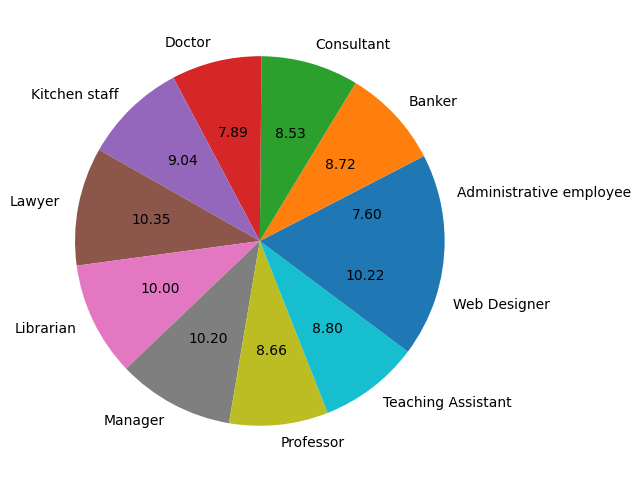

In [19]:
df = combined_dataset.groupby('employment').sum()
series = pd.Series(df['userID'].to_list(), index=df.index.to_list())


series.plot.pie(autopct="%.2f",figsize=(6, 6));

---
Moodle quiz: what is the most represented profession?

---


## Journey length

Suisse Impossible Mission Force believes the rogue agent is an outlier from his declared category based on the days spent there compared to others.

We can use boxplots to identify outliers per employment category.

Let's first make two tables, one with the date of arrival and one with the date of departure (you can reuse your previous dataset for the date of arrival)

In [20]:
arrival = combined_dataset_arrival

start = pd.to_datetime('2019-09-01')

departure = combined_dataset[combined_dataset['date'] >= start][combined_dataset['departure'] == 'US'][combined_dataset['UserID'].isin(combined_dataset_arrival.userID.to_list())]



<ipython-input-20-c43bd7ea7733>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  departure = combined_dataset[combined_dataset['date'] >= start][combined_dataset['departure'] == 'US'][combined_dataset['UserID'].isin(combined_dataset_arrival.userID.to_list())]


We can keep on both these tables the user ID, employment, and departure date / arrival date.

In [21]:
arrival = arrival[['userID', 'employment', 'date']]
departure = departure[['userID', 'employment', 'date']]

We can now join the two tables on user ID

In [22]:
departure_arrival_df = pd.merge(arrival, departure, on="userID")
departure_arrival_df.head(2)

,userID,employment_x,date_x,employment_y,date_y
0,481578,Administrative employee,2020-05-03,Administrative employee,2020-07-02
1,852352,Professor,2020-01-04,Professor,2020-03-29
2,642133,Teaching Assistant,2020-08-04,Teaching Assistant,2021-02-13
3,434361,Kitchen staff,2020-10-06,Kitchen staff,2021-06-03
4,409055,Librarian,2020-10-07,Librarian,2021-04-22


We can now create a new feature called journey_length representing the arrival date - departure date

In [23]:
departure_arrival_df['journey_length'] = departure_arrival_df['date_y']-departure_arrival_df['date_x']
departure_arrival_df = departure_arrival_df[['employment_x', 'userID', 'journey_length']]

We can now create the boxplots

<Axes: title={'center': 'userID'}, xlabel='[employment_x]'>

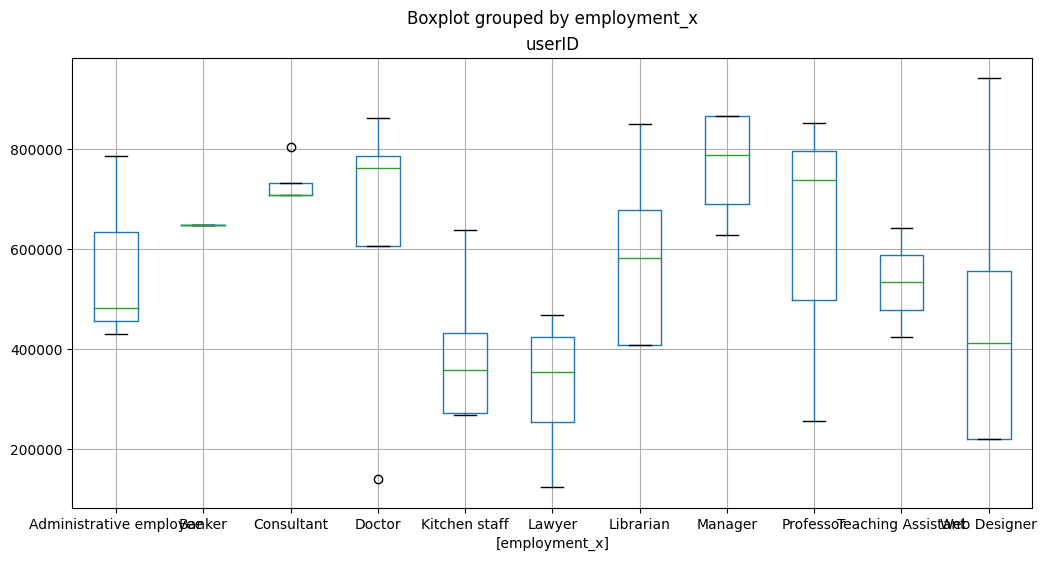

In [24]:
departure_arrival_df.boxplot(by = 'employment_x', figsize=(12,6))

---
Moodle question: what profession has the most staggering outlier ?

___

##SIMF is satisfied with your work but believes the current data is inconclusive.

Your investigation will continue when more intelligence comes in...